In [26]:
import numpy as np
import pandas as pd

from utils.timeutil import YearMonth

hst = pd.read_csv(".cache/historical_data.csv", dtype={"code": str})
hst["매수년월"] = hst["매수년월"].apply(lambda x: YearMonth.from_string(x))
hst["매도년월"] = hst["매도년월"].apply(lambda x: YearMonth.from_string(x))
hst = hst[hst["확정실적"].notna()]

In [64]:
# RECIPE ==========================================================

recipes = {
    "벨류": {
        "GP/P": 0.120550,
        "EQ/P": 0.105678,
    },
    "성장": {
        "O_QoQ": 0.027,
        "E_QoQ": 0.024,
        "EBT_QoQ": 0.017,
        "O/A_QoQ": 0.013,
        "E/EQ_QoQ": 0.011,
        "O/EQ_QoQ": 0.01,
        "E/A_QoQ": 0.009,
        "EBT/A_QoQ": 0.008,
        "EBT/EQ_QoQ": 0.006,
        "GP/EQ_QoQ": 0.004,
        "GP/A_QoQ": 0.004,
        "GP_QoQ": 0.003,
        "R_QoQ": 0.001,
        "R/EQ_QoQ": 0.001,
        "R/A_QoQ": 0.001,
    },
    "가격": {
        "P": -1
    },
    "전략1": {
        "가격": 1,
        "벨류": 1,
        "성장": 1
    },
    "퀄리티": {
        "O/EQ": 5,
        "EBT/EQ": 4,
        "E/EQ": 3,
    },
    "성장2": {
        "O_QoQ": 2,
        "EBT_QoQ": 1,
    },
    "전략2": {
        "퀄리티": 2,
        "성장2": 1,
        "O/P": 1
    },
    "전략": {
        "전략1": 1,
        "전략2": 1
    }
}

# =================================================================

pct_scale = 100
for title, recipe in recipes.items():
    # Calculate recipe
    hst[title] = hst.apply(lambda row: sum([row[f"{k}_pct"] * w for k, w in recipe.items()]), axis=1)

    # Calculate pct
    rank = hst.groupby("매도년월")[title].apply(lambda x: np.ceil(x.rank(pct=True) * pct_scale))
    hst[f"{title}_pct"] = rank.reset_index(level=0, drop=True)

hst

,code,매수년월,매도년월,종목명,매수일,매수가,P,vol,val,shares,...,퀄리티,퀄리티_pct,성장2,성장2_pct,전략,전략_pct,전략1,전략1_pct,전략2,전략2_pct
0,000020,2023-04,2023-05,동화약품,2023-04-28,8380.0,2.340657e+11,1682244.0,1.441033e+10,27931470.0,...,670.0,56.0,102.0,29.0,108.0,54.0,159.0,55.0,216.0,53.0
1,000040,2023-04,2023-05,KR모터스,2023-04-28,670.0,6.441277e+10,101678340.0,7.080840e+10,96138465.0,...,102.0,8.0,151.0,50.0,78.0,33.0,174.0,66.0,75.0,12.0
2,000050,2023-04,2023-05,경방,2023-04-28,10560.0,2.895053e+11,116735.0,1.246954e+09,27415270.0,...,450.0,36.0,70.0,18.0,77.0,32.0,141.0,42.0,161.0,35.0
3,000070,2023-04,2023-05,삼양홀딩스,2023-04-28,75600.0,6.474589e+11,181738.0,1.380864e+10,8564271.0,...,579.0,48.0,79.0,21.0,95.0,44.0,146.0,46.0,203.0,49.0
4,000080,2023-04,2023-05,하이트진로,2023-04-28,22250.0,1.560473e+12,5078029.0,1.129301e+11,70133611.0,...,897.0,77.0,66.0,17.0,82.0,35.0,100.0,19.0,245.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32428,457550,2024-04,2024-05,우진엔텍,2024-04-30,28450.0,2.637696e+11,22733262.0,6.636167e+11,9271339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32429,460850,2024-04,2024-05,동국씨엠,2024-04-30,6860.0,2.051048e+11,1889922.0,1.217616e+10,29898656.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32430,460860,2024-04,2024-05,동국제강,2024-04-30,11820.0,5.863668e+11,3438322.0,3.884573e+10,49608017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32433,462520,2024-04,2024-05,조선내화,2024-04-30,16430.0,1.947804e+11,221806.0,3.734882e+09,11855168.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
def pnl_by_pct(factor: str): return (
    hst
    .groupby(["매도년월", f"{factor}_pct"])["수익률"]
    .mean()
    .to_frame()
    .reset_index()
    .pivot(index="매도년월", columns=f"{factor}_pct")
    .droplevel(level=0, axis=1)
)


def agg_by_pct(factor: str):
    """
    cagr, mdd by factor
    """
    df = pnl_by_pct(factor)
    years = df.index.min().duration(df.index.max())
    cum = (df + 1).cumprod()
    dd = cum / cum.cummax() - 1
    return pd.DataFrame({
        "cagr": (df + 1).prod() ** (1 / years) - 1,
        "mdd": dd.min(),
    })


returns_bm = hst.groupby("매도년월")["수익률"].mean()


def agg_by_month(factor: str, port_size: int):
    """
    """
    returns_top = (
        hst
        .groupby("매도년월")
        .apply(
            lambda x: x.nlargest(port_size, f"{factor}_pct")["수익률"].mean(),
            include_groups=False
        )
    )

    df = pnl_by_pct(factor)
    return pd.DataFrame({
        "port": returns_top,
        "bm": returns_bm,
        "perform": returns_top - returns_bm,
        "corr": df.apply(lambda x: x.corr(pd.Series(x.index)), axis=1),
    })


def calc_performance(factor: str):
    df = agg_by_pct(factor)
    corr = df.reset_index().corr("spearman").loc[f"{factor}_pct", "cagr"]
    coef, _ = np.polyfit(df.index, df["cagr"], 1)
    return pd.Series({
        "factor": factor,
        "corr": corr,
        "coef": coef,
        "power": corr * coef
    })


In [66]:
"""모든 팩터 성능 측정"""

all_factors = [col.split("_pct")[0] for col in hst.columns if col.endswith("_pct")]

(
    pd.Series(all_factors)
    .apply(calc_performance)
    .sort_values("power", ascending=False)
    .reset_index(drop=1)
)

,factor,corr,coef,power
0,수익률,1.000000,1.642006,1.642006
1,전략2,0.591059,0.002657,0.001571
2,O/EQ,0.542514,0.002479,0.001345
3,퀄리티,0.542910,0.002470,0.001341
4,O/A,0.544146,0.002281,0.001241
5,EBT/EQ,0.522184,0.002325,0.001214
6,E/EQ,0.484956,0.002165,0.001050
7,전략,0.440360,0.002171,0.000956
8,EBT/A,0.448221,0.002129,0.000954
9,성장2,0.471215,0.002010,0.000947


In [82]:
target_factor = "전략"

<BarContainer object of 100 artists>

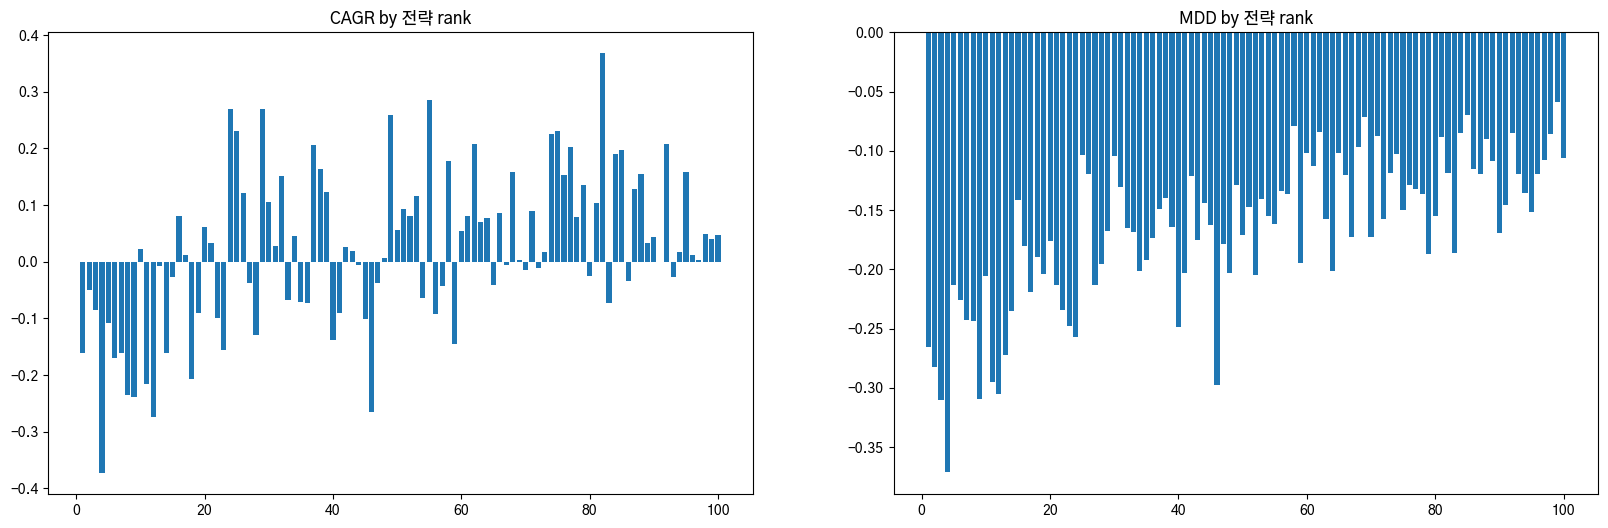

In [83]:
"""팩터 성능"""

import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = '../res/font/Gothic_A1/GothicA1-Medium.ttf'
font_manager.fontManager.addfont(font_path)
font_name = font_manager.fontManager.ttflist[-1].name
plt.rc("font", family=font_name)
plt.rc('axes', unicode_minus=False)
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.1)
plt.rcParams['agg.path.chunksize'] = 10_000

agg = agg_by_pct(target_factor)

n_rows, n_cols = 1, 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_figwidth(20), fig.set_figheight(6 * n_rows)

axes[0].set_title(f"CAGR by {target_factor} rank")
axes[0].bar(agg.index, agg["cagr"])

axes[1].set_title(f"MDD by {target_factor} rank")
axes[1].bar(agg.index, agg["mdd"])

,port,bm,perform,corr
매도년월,,,,
2023-05,0.052631,0.036923,0.015708,0.254528
2023-06,0.060795,0.010678,0.050117,0.522815
2023-07,-0.034174,-0.031269,-0.002906,-0.196190
2023-08,-0.001873,0.019210,-0.021084,-0.069795
2023-09,-0.028020,-0.058858,0.030837,0.579908
2023-10,-0.015162,-0.084643,0.069481,0.678760
2023-11,0.066684,0.090204,-0.023519,-0.353871
2023-12,-0.003278,0.029467,-0.032745,-0.197539
2024-01,-0.025052,-0.028281,0.003229,0.366517


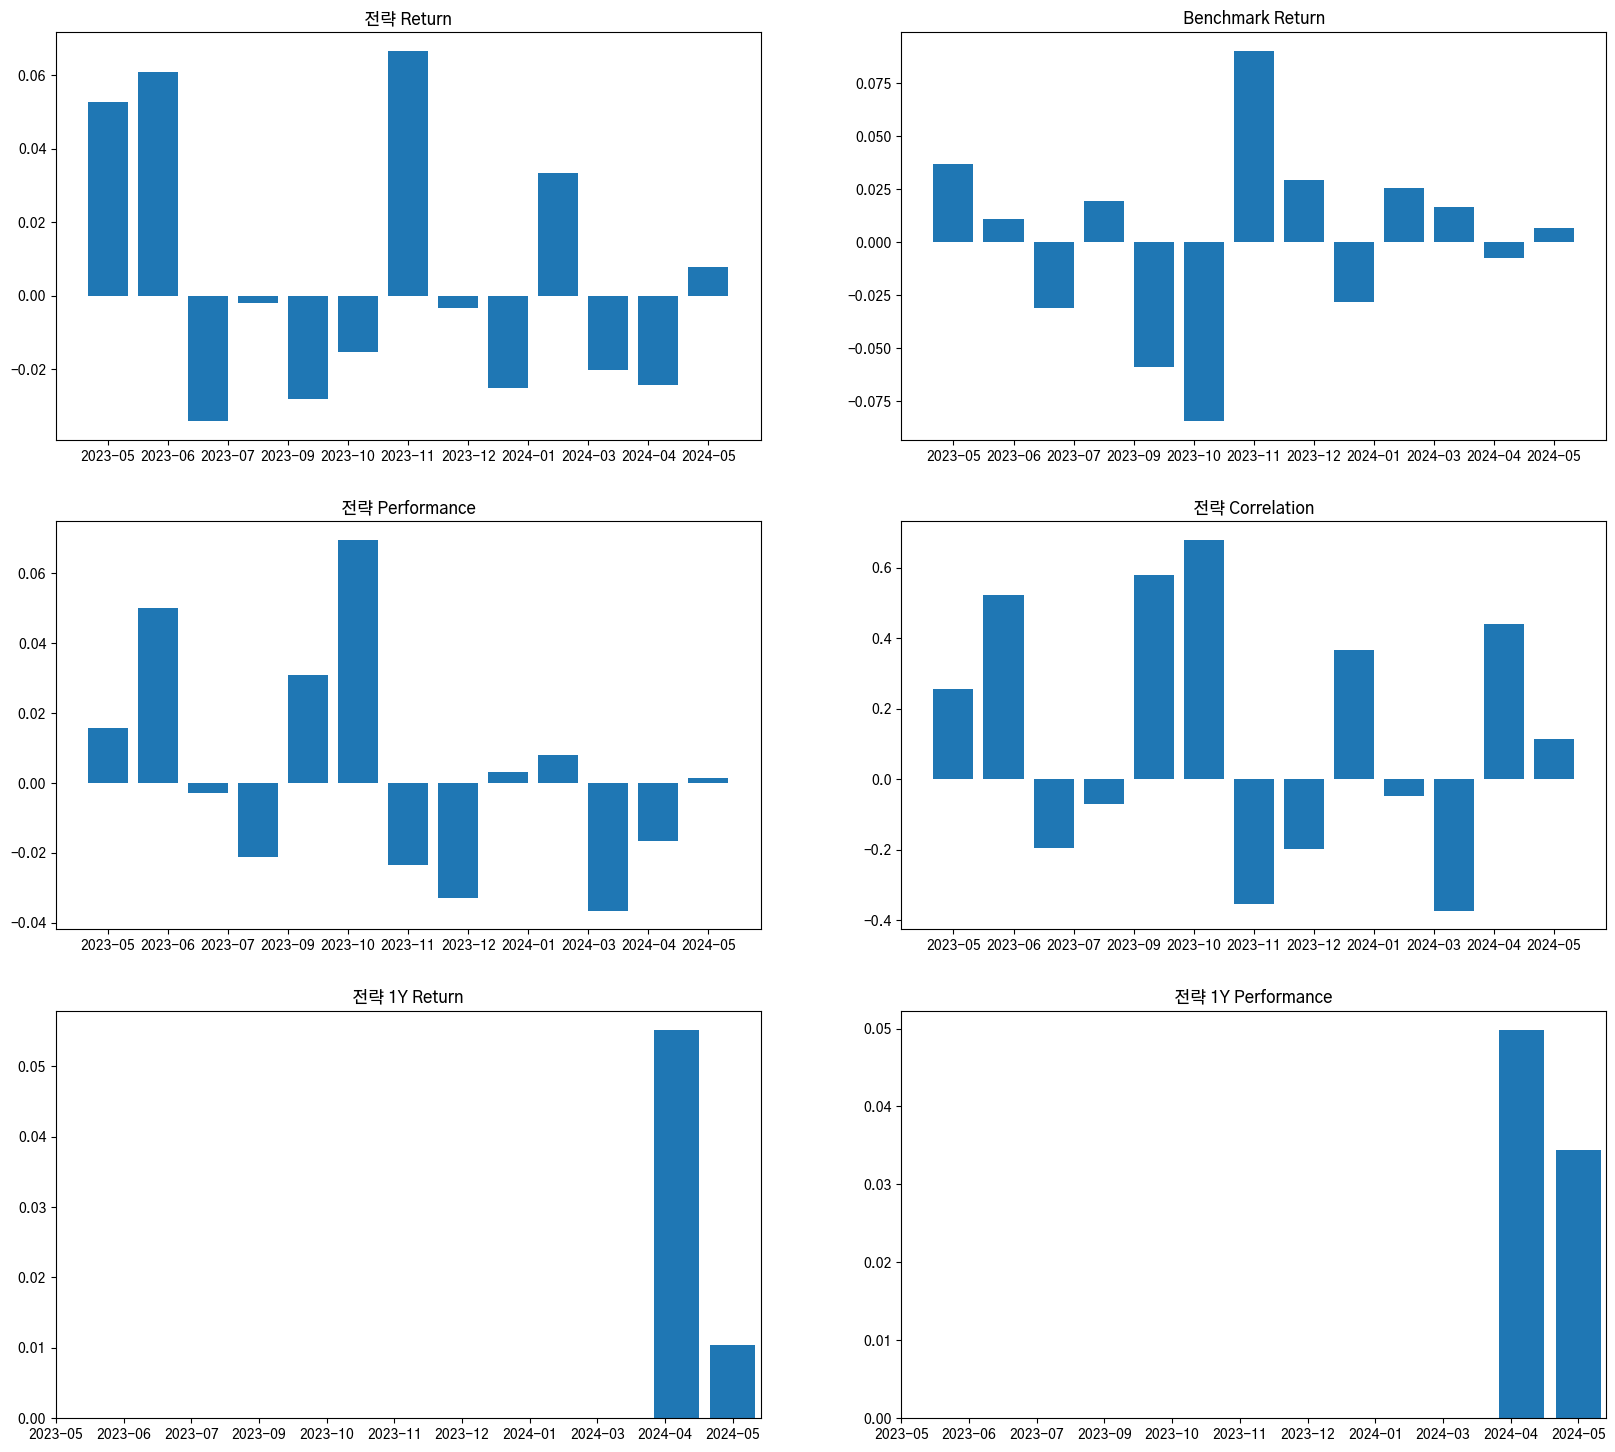

In [84]:
"""
월별 팩터 성능
"""

n_rows, n_cols = 3, 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_figwidth(20), fig.set_figheight(6 * n_rows)

agg = agg_by_month(target_factor, 50)

x_ticks = np.quantile(np.arange(0, len(agg)), [1 * i / 10 for i in range(10)] + [1])
x_values = [str(x) for x in agg.index]

axes[0][0].set_title(f"{target_factor} Return")
axes[0][0].bar(x_values, agg["port"])
axes[0][0].set_xticks(x_ticks)

axes[0][1].set_title(f"Benchmark Return")
axes[0][1].bar(x_values, agg["bm"])
axes[0][1].set_xticks(x_ticks)

axes[1][0].set_title(f"{target_factor} Performance")
axes[1][0].bar(x_values, agg["perform"])
axes[1][0].set_xticks(x_ticks)

axes[1][1].set_title(f"{target_factor} Correlation")
axes[1][1].bar(x_values, agg["corr"])
axes[1][1].set_xticks(x_ticks)

# 전략 1년 누적 수익률
rolling_port = agg["port"].rolling(window=12).apply(lambda x: (x + 1).prod() - 1)
axes[2][0].set_title(f"{target_factor} 1Y Return")
axes[2][0].bar(x_values, rolling_port)
axes[2][0].set_xticks(x_ticks)

# 전략 1년 누적 성능
rolling_perform = rolling_port - agg["bm"].rolling(window=12).apply(lambda x: (x + 1).prod() - 1)
axes[2][1].set_title(f"{target_factor} 1Y Performance")
axes[2][1].bar(x_values, rolling_perform)
axes[2][1].set_xticks(x_ticks)

# round(df * 100, 2)
agg

In [85]:
# 월별 포트 구성
port = (
    hst
    .groupby("매도년월")
    .apply(lambda x: x.nlargest(20, f"{target_factor}_pct").sort_values("수익률"), include_groups=False)
    .droplevel(level=1)
    [["code", "종목명", "매수일", "매도일", "수익률", "매수가", "매도가"] + [f"{f}_pct" for f in recipes[target_factor].keys()]]
)
port.reset_index(drop=True).to_csv(".cache/port.csv")
port

,code,종목명,매수일,매도일,수익률,매수가,매도가,전략1_pct,전략2_pct
매도년월,,,,,,,,,
2023-05,069730,DSR제강,2023-04-28,2023-05-31,-0.064176,5220.0,4885.0,98.0,97.0
2023-05,009180,한솔로지스틱스,2023-04-28,2023-05-31,-0.062500,2960.0,2775.0,96.0,100.0
2023-05,054930,유신,2023-04-28,2023-05-31,-0.038700,32300.0,31050.0,94.0,99.0
2023-05,001770,SHD,2023-04-28,2023-05-31,-0.017301,28900.0,28400.0,98.0,99.0
2023-05,155660,DSR,2023-04-28,2023-05-31,-0.011858,5060.0,5000.0,98.0,99.0
...,...,...,...,...,...,...,...,...,...
2024-05,019540,일지테크,2024-04-30,2024-05-31,0.092077,4670.0,5100.0,100.0,100.0
2024-05,043260,성호전자,2024-04-30,2024-05-31,0.093516,1604.0,1754.0,95.0,100.0
2024-05,267790,배럴,2024-04-30,2024-05-31,0.094703,6230.0,6820.0,98.0,98.0


In [86]:
pnl_by_code = port.groupby(["code", "종목명"]).agg(
    count=pd.NamedAgg(column="수익률", aggfunc="size"),
    평균수익률=pd.NamedAgg(column="수익률", aggfunc="mean"),
    누적수익률=pd.NamedAgg(column="수익률", aggfunc="mean")
)
pnl_by_code.to_csv(".cache/pnl_by_code.csv")
pnl_by_code

,,count,평균수익률,누적수익률
code,종목명,,,
001020,페이퍼코리아,1,0.036188,0.036188
001770,SHD,1,-0.017301,-0.017301
002460,화성산업,3,0.009294,0.009294
003100,선광,2,-0.028751,-0.028751
004780,대륙제관,2,0.005484,0.005484
...,...,...,...,...
224110,에이텍모빌리티,1,0.126323,0.126323
263020,디케이앤디,3,-0.057461,-0.057461
267790,배럴,2,0.020756,0.020756
